<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/Homework-3/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [233]:
test_data = pd.read_csv('ZipDigits.test', header=None, delim_whitespace=True)
train_data = pd.read_csv('ZipDigits.train', header=None, delim_whitespace=True)

train_data_binary = train_data[train_data[0].isin([1, 5])]
train_data[0] = train_data[0].apply(lambda x: 1 if x == 1 else -1)

test_data_binary = test_data[test_data[0].isin([1, 5])]
test_data[0] = test_data[0].apply(lambda x: 1 if x == 1 else -1)



In [234]:
# Define functions to calculate intensity and symmetry features
def intensity(image):
    return np.mean(image[1:])

def symmetry(image):
    left_half = image[1:129]  # Corrected split into left and right halves
    right_half = image[129:]  # Corrected split into left and right halves
    return np.abs(np.sum(left_half - np.flip(right_half)))

In [235]:
# Calculate features for each image in the training dataset
train_data['Intensity'] = train_data.apply(lambda row: intensity(row.values[1:]), axis=1)
train_data['Symmetry'] = train_data.apply(lambda row: symmetry(row.values[1:]), axis=1)

test_data['Intensity'] = test_data.apply(lambda row: intensity(row.values[1:]), axis=1)
test_data['Symmetry'] = test_data.apply(lambda row: symmetry(row.values[1:]), axis=1)

In [236]:
X = np.array(train_data[['Intensity', 'Symmetry']].T)
Y = np.array(train_data[0])

In [237]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def forward_propagation(X, W1, b1, W2, b2):
    a1 = X
    z2 = np.dot(W1, a1) + b1
    a2 = tanh(z2)
    z3 = np.dot(W2, a2) + b2
    a3 = tanh(z3)

    return a1, z2, a2, z3, a3

def backward_propagation(X, Y, a1, z2, a2, z3, a3, W2):
    delta3 = 2 * (a3 - Y) * tanh_derivative(z3)
    dW2 = np.dot(delta3, a2.T)
    db2 = np.sum(delta3, axis=1, keepdims=True)
    delta2 = np.dot(W2.T, delta3) * tanh_derivative(z2)
    dW1 = np.dot(delta2, a1.T)
    db1 = np.sum(delta2, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def compute_cost(a3, Y):
    return np.mean((a3 - Y)**2)


def sign_function(z):
    return np.sign(z)

def plot_cost_iteration(costs,y_lim):
    iterations = range(1, len(costs) + 1)
    plt.plot(iterations, costs)
    plt.title('Cost Function E(w) vs. Iteration Number')
    plt.xlabel('Iteration Number')
    plt.ylabel('Cost Function E(w)')
    plt.ylim(0, y_lim)
    plt.show()

In [238]:
print("Sample of ZipDigits.train dataset:")
print(train_data.head())
num_samples = train_data.shape[0]
print(test_data.head())
#print(f"Number of samples in ZipDigits.train: {num_samples}")

Sample of ZipDigits.train dataset:
   0    1    2    3      4      5      6      7      8      9  ...    249  \
0 -1 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862  ...  1.000   
1 -1 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ... -0.033   
2 -1 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ... -1.000   
3 -1 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ...  0.536   
4 -1 -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...  1.000   

     250    251    252    253    254    255  256  Intensity   Symmetry  
0  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  -0.315141  79.367859  
1  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  -0.108255   6.536745  
2 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  -0.536184  26.032816  
3 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  -0.597878  36.436878  
4  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  -0.413839  16.085161  

[5 rows x 259 columns]
   0    1    2    3      4    5      6  

In [239]:

train_data_binary = train_data[train_data[0].isin([1, 5])]
train_data_binary[0] = train_data_binary[0].apply(lambda x: 1 if x == 1 else -1)
print(train_data_binary.shape)
X_train = train_data_binary.iloc[:, 1:].values.T  # Features (transpose for compatibility with the neural network)
print(X_train.shape)
Y_train = train_data_binary.iloc[:, 0].values.reshape(1, -1)  # Labels
print(X_train.shape)
X_train = X_train / 255.0



(1005, 259)
(258, 1005)
(258, 1005)


<ipython-input-239-e97909bb1177>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_binary[0] = train_data_binary[0].apply(lambda x: 1 if x == 1 else -1)


In [240]:
test_data_binary = test_data[test_data[0].isin([1, 5])]
test_data_binary[0] = test_data_binary[0].apply(lambda x: 1 if x == 1 else -1)
print(test_data_binary.shape)
X_test = test_data_binary.iloc[:, 1:].values.T  # Features (transpose for compatibility with the neural network)
print(X_test.shape)
Y_test = test_data_binary.iloc[:, 0].values.reshape(1, -1)  # Labels
print(X_test.shape)
X_test = X_test / 255.0

(264, 259)
(258, 264)
(258, 264)


<ipython-input-240-78837f37f7ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_binary[0] = test_data_binary[0].apply(lambda x: 1 if x == 1 else -1)


In [241]:
def neural_network(X, Y, learning_rate, num_epochs, m, batch_size=None):
    num_samples = X.shape[1]
    num_features = X.shape[0]

    W1 = np.random.randn(m, num_features)
    b1 = np.zeros((m, 1))
    W2 = np.random.randn(1, m)
    b2 = np.zeros((1, 1))

    costs = []
    min_cost = float('inf')
    max_cost = float('-inf')

    for epoch in range(num_epochs):
        total_cost = 0


        shuffled_indices = np.random.permutation(num_samples)
        X_shuffled = X[:, shuffled_indices]
        Y_shuffled = Y[:, shuffled_indices]

        if batch_size is None or batch_size == 1:
            batches = [(i, i + 1) for i in range(num_samples)]
        else:
            batches = [(i, min(i + batch_size, num_samples)) for i in range(0, num_samples, batch_size)]

        for i, j in batches:
            x_batch = X_shuffled[:, i:j]
            y_batch = Y_shuffled[:, i:j]
            temp = (epoch + 1) * len(batches)
            if temp >= 2000000:
              return W1, b1, W2, b2, costs

            a1, z2, a2, z3, a3 = forward_propagation(x_batch, W1, b1, W2, b2)
            dW1, db1, dW2, db2 = backward_propagation(x_batch, y_batch, a1, z2, a2, z3, a3, W2)

            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2

            cost_i = compute_cost(a3, y_batch)
            total_cost += cost_i

            if cost_i < min_cost:
                min_cost = cost_i
            if cost_i > max_cost:
                max_cost = cost_i

            costs.append(total_cost)

        average_cost = total_cost / num_samples




        print(f"Epoch {epoch+1}/{num_epochs},Cost: {average_cost},iterations:{temp}")

    return W1, b1, W2, b2, costs

In [242]:
learning_rate = 0.01
num_epochs = 10000
m = 10  # Number of hidden units

# sgd
W1_sgd, b1_sgd, W2_sgd, b2_sgd, costs_sgd = neural_network(X_train, Y_train, learning_rate, num_epochs, m, batch_size=1)



Epoch 1/10000,Cost: 0.0050816983637945335,iterations:1005
Epoch 2/10000,Cost: 0.00039721294542988513,iterations:2010
Epoch 3/10000,Cost: 0.00023777717368283623,iterations:3015
Epoch 4/10000,Cost: 0.0001714368968067307,iterations:4020
Epoch 5/10000,Cost: 0.00013464313951595293,iterations:5025
Epoch 6/10000,Cost: 0.00011114001691068094,iterations:6030
Epoch 7/10000,Cost: 9.478501424511066e-05,iterations:7035
Epoch 8/10000,Cost: 8.27274017965669e-05,iterations:8040
Epoch 9/10000,Cost: 7.345896956555556e-05,iterations:9045
Epoch 10/10000,Cost: 6.610565748045142e-05,iterations:10050
Epoch 11/10000,Cost: 6.012531825702336e-05,iterations:11055
Epoch 12/10000,Cost: 5.516345475443838e-05,iterations:12060
Epoch 13/10000,Cost: 5.097837422663545e-05,iterations:13065
Epoch 14/10000,Cost: 4.739952189839529e-05,iterations:14070
Epoch 15/10000,Cost: 4.430305163995368e-05,iterations:15075
Epoch 16/10000,Cost: 4.159681436825803e-05,iterations:16080
Epoch 17/10000,Cost: 3.92108522911008e-05,iterations:17

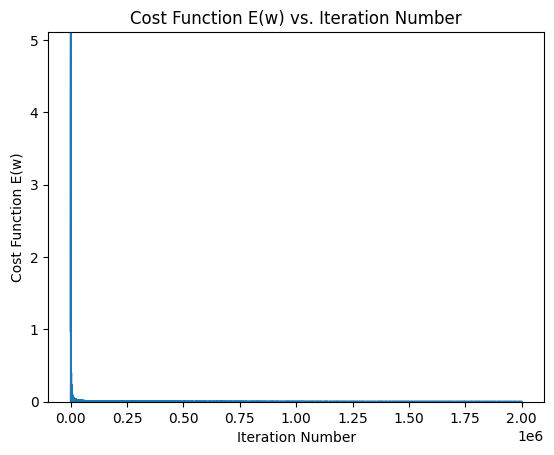

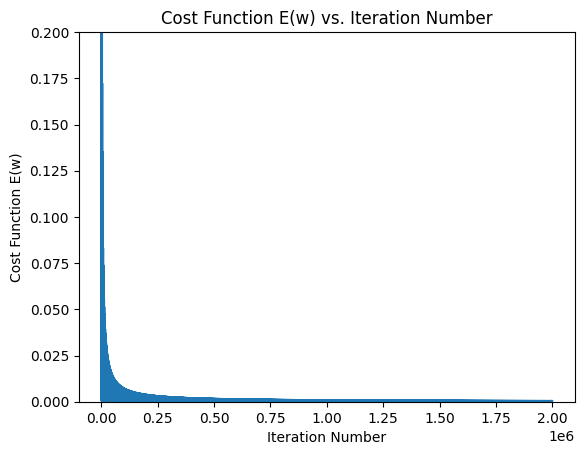

In [243]:
y_lim=(max(costs_sgd))
plot_cost_iteration(costs_sgd,y_lim)


plot_cost_iteration(costs_sgd,y_lim=0.2)

In [244]:
# mini-batch gradient descent
num_epochs = 10000000
W1, b1, W2, b2, costs = neural_network(X_train, Y_train, learning_rate, num_epochs, m, batch_size=32)


Streaming output truncated to the last 5000 lines.
Epoch 57500/10000000,Cost: 2.9764290518472136e-10,iterations:1840000
Epoch 57501/10000000,Cost: 2.975143250064678e-10,iterations:1840032
Epoch 57502/10000000,Cost: 2.9760548678388227e-10,iterations:1840064
Epoch 57503/10000000,Cost: 2.9711194251103267e-10,iterations:1840096
Epoch 57504/10000000,Cost: 2.972797200416648e-10,iterations:1840128
Epoch 57505/10000000,Cost: 2.976257510792172e-10,iterations:1840160
Epoch 57506/10000000,Cost: 2.9719221446573736e-10,iterations:1840192
Epoch 57507/10000000,Cost: 2.972311268796436e-10,iterations:1840224
Epoch 57508/10000000,Cost: 2.974085197941747e-10,iterations:1840256
Epoch 57509/10000000,Cost: 2.974908531397263e-10,iterations:1840288
Epoch 57510/10000000,Cost: 2.9735891323221026e-10,iterations:1840320
Epoch 57511/10000000,Cost: 2.9759966819484743e-10,iterations:1840352
Epoch 57512/10000000,Cost: 2.97074779053021e-10,iterations:1840384
Epoch 57513/10000000,Cost: 2.9734503019479245e-10,iterations

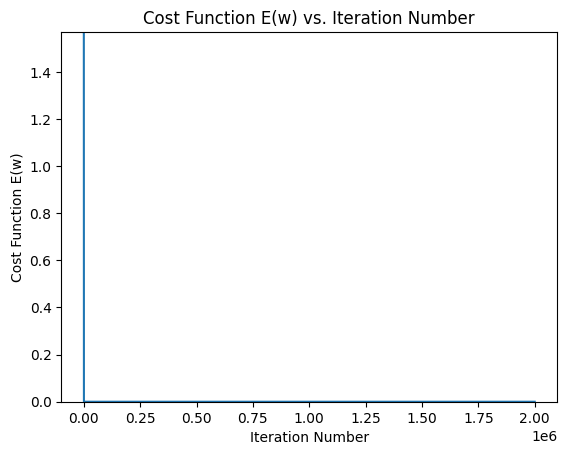

In [272]:
y_lim=(max(costs))
plot_cost_iteration(costs,y_lim)


In [318]:
print('train accuracy sgd',(1- costs_sgd[-1])*100)
print('train accuracy mbgd',(1- costs[-1])*100)


train accuracy sgd 99.95760417711611
train accuracy mbgd 99.99997133089401
